In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#reading dataset
data=pd.read_csv(r'C:\\Users\\hp\\Documents\\HRC pdf\\dataset.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  int64  
 5   doc_id                  50000 non-null  int64  
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  int64  
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [4]:
data.shape

(50000, 19)

In [5]:
len(pd.unique(data['posting_id'])) #constant

1

In [6]:
data.drop(columns=['posting_id'],inplace=True)#since constant column will not contribute so drop

In [7]:
#area_business have all null values so drop
data.drop(['area_business'],axis=1,inplace=True)

In [8]:
#invoice have some values null
data['invoice_id'].isnull().sum()

6

In [9]:
data.loc[data['invoice_id'].isnull()]#null values are not useful so drop

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5095,CA02,140106054,TREE us,5/31/2019 0:00,2019,9500000107,3/29/2019,20190329,20190306,20190316,CAD,X2,1570.59,20190306,CA10,NaN,0
19450,CA02,100054351,UNF corp,5/2/2019 0:00,2019,9500000133,3/29/2019,20190329,20190314,20190324,CAD,X2,5964.00,20190314,CA10,NaN,0
30322,CA02,140104429,COSTCO systems,5/2/2019 0:00,2019,9500000019,3/29/2019,20190329,20190219,20190301,CAD,X2,5353.20,20190219,CA10,NaN,0
31009,CA02,140106054,TREE llc,5/6/2019 0:00,2019,9500000104,3/29/2019,20190329,20190208,20190218,CAD,X2,938.43,20190208,CA10,NaN,0
38443,CA02,140106054,TREE in,5/6/2019 0:00,2019,9500000129,3/29/2019,20190329,20190128,20190207,CAD,X2,12636.00,20190128,CA10,NaN,0
44500,CA02,140106054,TREE in,5/6/2019 0:00,2019,9500000101,3/29/2019,20190329,20190131,20190210,CAD,X2,216.80,20190131,CA10,NaN,0


In [10]:
#droping invoice value having the nan value 
data=data.dropna(axis=0, subset=['invoice_id'])

In [11]:
#checking invoice value now no null value is there
data['invoice_id'].isnull().sum()

0

In [12]:
for i in data.columns:
  print(i)

business_code
cust_number
name_customer
clear_date
buisness_year
doc_id
posting_date
document_create_date
document_create_date.1
due_in_date
invoice_currency
document type
total_open_amount
baseline_create_date
cust_payment_terms
invoice_id
isOpen


In [13]:
#checking duplicate rows:
data.duplicated().sum()

1161

In [14]:
#checking duplicate columns:
data_t = data.T
data_t.duplicated().sum()

1

In [15]:
#displaying duplicated column
data_t[data_t.duplicated()]

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
invoice_id,1930438491.0,1929646410.0,1929873765.0,2960623488.0,1930147974.0,2960581231.0,1930083373.0,1930659387.0,1929439637.0,1928819386.0,...,1929365364.0,1930001131.0,1930702251.0,1930377837.0,1929600989.0,1930797071.0,1929744070.0,1930536775.0,1930198546.0,1928576325.0


In [16]:
#no of rows before removing duplicated columns is 17
dt=data_t.T
dt.shape

(49994, 17)

In [17]:
#after removing duplicate column, 16 columns
data_unique = data_t.drop_duplicates(keep='first').T
data_unique.shape


(49994, 16)

In [18]:
#once again checking duplicated rows(of the transpose)
data_uni=data_unique.T
data_uni.duplicated().sum()

0

In [19]:
data_unique

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR corp,2/11/2020 0:00,2020,1930438491,1/26/2020,20200125,20200126,20200210,USD,RV,54273.28,20200126,NAH4,0
1,U001,200980828,BEN E,8/8/2019 0:00,2019,1929646410,7/22/2019,20190722,20190722,20190811,USD,RV,79656.6,20190722,NAD1,0
2,U001,200792734,MDV/ trust,12/30/2019 0:00,2019,1929873765,9/14/2019,20190914,20190914,20190929,USD,RV,2253.86,20190914,NAA8,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,3/30/2020,20200330,20200330,20200410,CAD,RV,3299.7,20200331,CA10,1
4,U001,200769623,WAL-MAR foundation,11/25/2019 0:00,2019,1930147974,11/13/2019,20191113,20191113,20191128,USD,RV,33133.29,20191113,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200561861,CO corporation,NaN,2020,1930797071,4/21/2020,20200417,20200421,20200506,USD,RV,3187.86,20200421,NAA8,1
49996,U001,200769623,WAL-MAR co,9/3/2019 0:00,2019,1929744070,8/15/2019,20190814,20190815,20190830,USD,RV,6766.54,20190815,NAH4,0
49997,U001,200772595,SAFEW associates,3/5/2020 0:00,2020,1930536775,2/19/2020,20200218,20200219,20200305,USD,RV,6120.86,20200219,NAA8,0
49998,U001,200726979,BJ'S llc,12/12/2019 0:00,2019,1930198546,11/27/2019,20191126,20191127,20191212,USD,RV,63.48,20191127,NAA8,0


In [20]:
#document type is constant
len(pd.unique(data_unique['document type']))

1

In [21]:
#drop cons column
data_unique.drop(columns=['document type'],inplace=True)

In [22]:
#document type is now drop off
data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   business_code           49994 non-null  object
 1   cust_number             49994 non-null  object
 2   name_customer           49994 non-null  object
 3   clear_date              39994 non-null  object
 4   buisness_year           49994 non-null  object
 5   doc_id                  49994 non-null  object
 6   posting_date            49994 non-null  object
 7   document_create_date    49994 non-null  object
 8   document_create_date.1  49994 non-null  object
 9   due_in_date             49994 non-null  object
 10  invoice_currency        49994 non-null  object
 11  total_open_amount       49994 non-null  object
 12  baseline_create_date    49994 non-null  object
 13  cust_payment_terms      49994 non-null  object
 14  isOpen                  49994 non-null  object
dtypes:

In [23]:
data_unique.shape

(49994, 15)

In [24]:
#checking duplicate rows:
data_unique.duplicated().sum()

1161

In [25]:
#droping off the duplicates rows:
data_unique.drop_duplicates(keep='first',inplace=True)

In [26]:
data_unique.shape

(48833, 15)

In [27]:
#checking again duplicate rows:
data_unique.duplicated().sum()

0

In [28]:
data_unique.groupby(['buisness_year'])['buisness_year'].agg({'count'})

,count
buisness_year,
2019,33969
2020,14864


In [29]:
#converting to datetime format
data_unique['document_create_date']=pd.to_datetime(data_unique['document_create_date'].astype(int).astype(str))
data_unique['clear_date']= pd.to_datetime(data_unique['clear_date'])
data_unique['due_in_date']= pd.to_datetime(data_unique['due_in_date'].astype(int).astype(str))
data_unique['document_create_date.1']= pd.to_datetime(data_unique['document_create_date.1'].astype(int).astype(str))
data_unique['posting_date']= pd.to_datetime(data_unique['posting_date'])
data_unique['baseline_create_date']= pd.to_datetime(data_unique['baseline_create_date'].astype(int).astype(str))


In [30]:
data_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48833 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48833 non-null  object        
 1   cust_number             48833 non-null  object        
 2   name_customer           48833 non-null  object        
 3   clear_date              39152 non-null  datetime64[ns]
 4   buisness_year           48833 non-null  object        
 5   doc_id                  48833 non-null  object        
 6   posting_date            48833 non-null  datetime64[ns]
 7   document_create_date    48833 non-null  datetime64[ns]
 8   document_create_date.1  48833 non-null  datetime64[ns]
 9   due_in_date             48833 non-null  datetime64[ns]
 10  invoice_currency        48833 non-null  object        
 11  total_open_amount       48833 non-null  object        
 12  baseline_create_date    48833 non-null  dateti

In [31]:
############splitting into test set and big dataset based on clear date##########3

In [32]:
#divide test set 
test_data=data_unique[data_unique.clear_date.isnull()].reset_index(drop=True)
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-03-30,2020-03-30,2020-04-10,CAD,3299.7,2020-03-31,CA10,1
1,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-03-18,2020-03-19,2020-04-03,USD,11173.02,2020-03-19,NAA8,1
2,U001,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-06,2020-03-11,2020-03-26,USD,3525.59,2020-03-11,NAA8,1
3,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-15,2020-04-15,2020-04-30,USD,121105.65,2020-04-15,NAA8,1
4,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-23,2020-04-23,2020-04-26,USD,3726.06,2020-04-16,NAM2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,200769623,WAL-MAR in,NaT,2020,1930624804,2020-03-10,2020-03-09,2020-03-10,2020-03-25,USD,13114.99,2020-03-10,NAH4,1
9677,U001,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,8899.71,2020-05-03,NAH4,1
9678,U001,200148860,DOLLA co,NaT,2020,1930637779,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,4967.06,2020-03-11,NAA8,1
9679,U001,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,1998.64,2020-03-25,NAA8,1


In [33]:
#creating rest bigdata set
big_set=data_unique[data_unique.clear_date.notnull()].reset_index(drop=True)
big_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,79656.6,2019-07-22,NAD1,0
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0
3,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0
4,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,CA10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39147,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,84780.4,2019-07-10,NAC6,0
39148,U001,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0
39149,U001,200772595,SAFEW associates,2020-03-05,2020,1930536775,2020-02-19,2020-02-18,2020-02-19,2020-03-05,USD,6120.86,2020-02-19,NAA8,0
39150,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0


In [34]:
df1=big_set[big_set['document_create_date.1']>big_set['clear_date']] ##checking if create date.1 is after than clear date
df1

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen


In [35]:
#Finding min and max dates of create dat.1 of test case
min_dt_test=test_data['document_create_date.1'].min()
max_dt_test=test_data['document_create_date.1'].max()
print("Min create date 1",min_dt_test,"Max create date 1",max_dt_test)

Min create date 1 2020-02-27 00:00:00 Max create date 1 2020-05-22 00:00:00


In [36]:
#Finding min and max dates of create dat.1 of big_set
min_dt_big=big_set['document_create_date.1'].min()
max_dt_big=big_set['document_create_date.1'].max()
print("Min create date 1",min_dt_big,"Max create date 1",max_dt_big)

Min create date 1 2018-12-30 00:00:00 Max create date 1 2020-02-27 00:00:00


In [37]:
test_data.shape

(9681, 15)

In [38]:
###################splitting big_set to train set, val2, val1 based on document_create_date.1####################

In [39]:
#splitting to validation set 2
val2=big_set[big_set['document_create_date.1'] >= '2020-01-16'].copy()
val2.shape

(3785, 15)

In [40]:
val2.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR corp,2020-02-11,2020,1930438491,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,54273.28,2020-01-26,NAH4,0
1,U001,200769623,WAL-MAR systems,2020-02-05,2020,1930438462,2020-01-24,2020-01-24,2020-01-24,2020-02-08,USD,53349.54,2020-01-24,NAH4,0
2,U001,200769623,WAL-MAR co,2020-02-04,2020,1930431304,2020-01-24,2020-01-23,2020-01-24,2020-02-08,USD,11307.78,2020-01-24,NAH4,0
3,U001,200337148,COAS corporation,2020-02-06,2020,1930415312,2020-01-22,2020-01-20,2020-01-22,2020-02-06,USD,54714.07,2020-01-22,NAA8,0
4,U001,200769623,WAL-MAR corp,2020-03-04,2020,1930555074,2020-02-22,2020-02-22,2020-02-22,2020-03-08,USD,3228.13,2020-02-22,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,U001,200701487,KAGO systems,2020-02-25,2020,1930515647,2020-02-19,2020-02-11,2020-02-19,2020-02-29,USD,7026.8,2020-02-19,NA10,0
3781,CA02,140106408,WAL-M,2020-02-21,2020,2960610553,2020-01-28,2020-01-28,2020-01-28,2020-02-08,CAD,1082.69,2020-01-29,CA10,0
3782,U001,200726979,BJ'S us,2020-02-18,2020,1930475554,2020-02-03,2020-02-04,2020-02-03,2020-02-18,USD,348.35,2020-02-03,NAA8,0
3783,U001,200772670,ASSOCIAT us,2020-03-05,2020,1930542361,2020-02-18,2020-02-19,2020-02-18,2020-03-04,USD,33729.79,2020-02-18,NAU5,0


In [41]:
#removing validation set 2 from big_set
big_set.drop(big_set[big_set['document_create_date.1'] >= '2020-01-16'].index, inplace = True)
big_set['document_create_date.1'].max()

Timestamp('2020-01-15 00:00:00')

In [42]:
#splitting rest big set to val1 and train set
val1=big_set[big_set['document_create_date.1'] >= '2019-12-05'].copy()
val1.shape

(2610, 15)

In [43]:
val1.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U013,100053554,SYSTEMS systems,2020-02-11,2020,1991837617,2020-01-11,2020-01-07,2020-01-11,2020-02-10,USD,5683.5,2020-01-11,NAVE,0
1,U001,200769623,WAL-MAR associates,2020-01-21,2020,1930353067,2020-01-04,2020-01-04,2020-01-04,2020-01-19,USD,4953.83,2020-01-04,NAH4,0
2,U001,200701314,MBM foundation,2020-01-31,2020,1930391457,2020-01-15,2020-01-13,2020-01-15,2020-01-30,USD,12606.72,2020-01-15,NAA8,0
3,U001,200769623,WAL-MAR foundation,2020-01-24,2020,1930395090,2020-01-14,2020-01-13,2020-01-14,2020-01-29,USD,71008.69,2020-01-14,NAH4,0
4,U001,200783609,PROFIC corporation,2020-01-29,2020,1930395778,2020-01-14,2020-01-14,2020-01-14,2020-01-29,USD,20306.46,2020-01-14,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2605,U001,200726979,BJ'S associates,2019-12-26,2019,1930256948,2019-12-10,2019-12-10,2019-12-10,2019-12-25,USD,151.85,2019-12-10,NAA8,0
2606,U001,200772670,ASSOCIAT co,2019-12-31,2019,1930292877,2019-12-18,2019-12-18,2019-12-18,2020-01-02,USD,76555.83,2019-12-18,NAU5,0
2607,U001,200353024,DECA llc,2019-12-16,2019,1930221400,2019-12-05,2019-12-05,2019-12-05,2019-12-24,USD,151.56,2019-12-01,NAM4,0
2608,U001,200780383,MEIJ co,2019-12-23,2019,1930224300,2019-12-06,2019-12-05,2019-12-06,2019-12-21,USD,106708.7,2019-12-06,NAA8,0


In [44]:
train_set=big_set[big_set['document_create_date.1'] < '2019-12-05'].copy()
train_set.shape

(32757, 15)

In [45]:
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,79656.6,2019-07-22,NAD1,0
1,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0
2,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0
3,CA02,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,CA10,0
4,U001,200769623,WAL-MAR in,2019-11-12,2019,1930083373,2019-11-01,2019-10-31,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32752,U001,200726979,BJ'S llc,2019-09-26,2019,1929853889,2019-09-10,2019-09-09,2019-09-10,2019-09-25,USD,544.82,2019-09-10,NAA8,0
32753,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,84780.4,2019-07-10,NAC6,0
32754,U001,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0
32755,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0


In [46]:
##############target label#################

In [47]:
train_set['target_delay']=(train_set['clear_date'] - train_set['due_in_date'])
train_set['target_delay']=train_set['target_delay'].dt.days


In [48]:
train_set.corr()

,target_delay
target_delay,1.0


In [49]:
train_set['target_delay'].describe()

count    32757.000000
mean         0.948530
std         10.905976
min        -89.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        204.000000
Name: target_delay, dtype: float64

In [50]:
#setting target_delay in val1 and  val2
val1['target_delay']=(val1['clear_date'] - val1['due_in_date'])
val1['target_delay']=val1['target_delay'].dt.days

val2['target_delay']=(val2['clear_date'] - val2['due_in_date'])
val2['target_delay']=val2['target_delay'].dt.days


In [51]:
###############################EDA and Feauture Engineering##########################

In [52]:
import seaborn as sns, numpy as np

In [53]:
########ENCODING STRING COLUMNS################ 

In [54]:
#encoding the train_set
train_set.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                            object
target_delay                       int64
dtype: object

In [55]:
#converting to numerical columns

#1.Business code
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train_set.groupby(['business_code']).count()


,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
business_code,,,,,,,,,,,,,,,
CA02,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
U001,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541,29541
U002,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
U005,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
U007,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
U013,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427


In [56]:
#label encoding in business code
labelencoder = LabelEncoder()

train_set['business_code'] = labelencoder.fit_transform(train_set['business_code'])
test_data['business_code'] = labelencoder.transform(test_data['business_code'])

val1['business_code'] = labelencoder.transform(val1['business_code'])

val2['business_code'] = labelencoder.transform(val2['business_code'])

train_set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
1,1,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,79656.6,2019-07-22,NAD1,0,-3
2,1,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,NAA8,0,92
3,1,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,NAH4,0,-3
4,0,140106181,THE corporation,2019-12-04,2019,2960581231,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,CA10,0,61
5,1,200769623,WAL-MAR in,2019-11-12,2019,1930083373,2019-11-01,2019-10-31,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,NAH4,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,1,200726979,BJ'S llc,2019-09-26,2019,1929853889,2019-09-10,2019-09-09,2019-09-10,2019-09-25,USD,544.82,2019-09-10,NAA8,0,1
39147,1,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,84780.4,2019-07-10,NAC6,0,0
39148,1,200769623,WAL-MAR co,2019-09-03,2019,1929744070,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,NAH4,0,4
39150,1,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,63.48,2019-11-27,NAA8,0,0


In [57]:
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,0,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-03-30,2020-03-30,2020-04-10,CAD,3299.7,2020-03-31,CA10,1
1,1,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-03-18,2020-03-19,2020-04-03,USD,11173.02,2020-03-19,NAA8,1
2,1,200418007,AM,NaT,2020,1930610806,2020-03-11,2020-03-06,2020-03-11,2020-03-26,USD,3525.59,2020-03-11,NAA8,1
3,1,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-15,2020-04-15,2020-04-30,USD,121105.65,2020-04-15,NAA8,1
4,1,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-23,2020-04-23,2020-04-26,USD,3726.06,2020-04-16,NAM2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,1,200769623,WAL-MAR in,NaT,2020,1930624804,2020-03-10,2020-03-09,2020-03-10,2020-03-25,USD,13114.99,2020-03-10,NAH4,1
9677,1,200769623,WAL-MAR corporation,NaT,2020,1930850962,2020-05-03,2020-05-02,2020-05-03,2020-05-18,USD,8899.71,2020-05-03,NAH4,1
9678,1,200148860,DOLLA co,NaT,2020,1930637779,2020-03-11,2020-03-11,2020-03-11,2020-03-26,USD,4967.06,2020-03-11,NAA8,1
9679,1,200900909,SYSCO co,NaT,2020,1930702251,2020-03-25,2020-03-25,2020-03-25,2020-04-09,USD,1998.64,2020-03-25,NAA8,1


In [58]:
train_set['business_code'].describe()

count    32757.000000
mean         0.974662
std          0.542800
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: business_code, dtype: float64

In [59]:
train_set['business_code'].corr(train_set['target_delay'])

-0.0014683262492606202

In [60]:
#### checking for customer number
len(pd.unique(train_set['cust_number'])) 

1000

In [61]:
###business year is constant drop
train_set.drop(['buisness_year'],axis=1,inplace=True)

In [62]:
len(pd.unique(train_set['cust_payment_terms'])) 

69

In [63]:
#replace cust_payment_terms having values < 12 as others and then encoding
threshlold = 0.000250
   
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_payment_terms'])['cust_payment_terms'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_payment_terms'] = np.where(train_set['cust_payment_terms'].isin(frequent_labels), train_set['cust_payment_terms'], 'others')
test_data['cust_payment_terms'] = np.where(test_data['cust_payment_terms'].isin(frequent_labels_tst), test_data['cust_payment_terms'], 'others')
val1['cust_payment_terms'] = np.where(val1['cust_payment_terms'].isin(frequent_labels_val1), val1['cust_payment_terms'], 'others')
val2['cust_payment_terms'] = np.where(val2['cust_payment_terms'].isin(frequent_labels_val2), val2['cust_payment_terms'], 'others')


test_data['cust_payment_terms'].value_counts()


NAA8      3974
NAH4      2898
CA10       693
NAC6       411
NAM4       266
NAGD       254
NAAX       239
NAU5       204
NAM2       110
NAD1       106
NAG2        81
NA32        79
NAX2        71
NA10        59
others      45
NAVE        39
NAD5        37
NAAW        32
NAM1        31
NAVF        17
NAWP        16
NAVQ        10
NABG         9
Name: cust_payment_terms, dtype: int64

In [64]:
train_set['cust_payment_terms'] = labelencoder.fit_transform(train_set['cust_payment_terms'])
test_data['cust_payment_terms'] = labelencoder.transform(test_data['cust_payment_terms'])
val1['cust_payment_terms'] = labelencoder.transform(val1['cust_payment_terms'])
val2['cust_payment_terms'] = labelencoder.transform(val2['cust_payment_terms'])
train_set['cust_payment_terms'].max()

40

In [65]:
##Now similarly encoding name_customer
len(pd.unique(train_set['name_customer'])) 

3592

In [66]:
threshlold = 0.000100
####Grouping rare labels as others
counts = train_set.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_tst = test_data.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val1 = val1.groupby(['name_customer'])['name_customer'].count() / len(train_set)
counts_val2 = val2.groupby(['name_customer'])['name_customer'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['name_customer'] = np.where(train_set['name_customer'].isin(frequent_labels), train_set['name_customer'], 'others')
test_data['name_customer'] = np.where(test_data['name_customer'].isin(frequent_labels_tst), test_data['name_customer'], 'others')
val1['name_customer'] = np.where(val1['name_customer'].isin(frequent_labels_val1), val1['name_customer'], 'others')
val2['name_customer'] = np.where(val2['name_customer'].isin(frequent_labels_val2), val2['name_customer'], 'others')


test_data['name_customer'].value_counts()


others                1930
WAL-MAR systems        257
WAL-MAR corp           248
WAL-MAR co             247
WAL-MAR associates     244
                      ... 
US  llc                  4
DOLLA us                 4
KROGE corp               4
GORDO systems            4
NASH  corporation        4
Name: name_customer, Length: 455, dtype: int64

In [67]:
train_set['name_customer'].value_counts()

others                 3544
WAL-MAR trust           753
WAL-MAR                 732
WAL-MAR in              723
WAL-MAR corporation     721
                       ... 
MARTIN systems            4
STATER  associates        4
BEN E associates          4
DEMOU corporation         4
BEN E                     4
Name: name_customer, Length: 1166, dtype: int64

In [68]:
#target encoding in name customer
target_mapper = train_set.groupby('name_customer')['target_delay'].mean().to_dict()
train_set['name_customer'] = train_set['name_customer'].map(target_mapper)
test_data['name_customer'] = test_data['name_customer'].map(target_mapper)
val1['name_customer'] = val1['name_customer'].map(target_mapper)
val2['name_customer'] = val2['name_customer'].map(target_mapper)
train_set

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
1,1,200980828,26.500000,2019-08-08,1929646410,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,79656.6,2019-07-22,17,0,-3
2,1,200792734,11.125000,2019-12-30,1929873765,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,2253.86,2019-09-14,10,0,92
3,1,200769623,-2.036657,2019-11-25,1930147974,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,33133.29,2019-11-13,22,0,-3
4,0,140106181,74.166667,2019-12-04,2960581231,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,22225.84,2019-09-24,2,0,61
5,1,200769623,-2.456432,2019-11-12,1930083373,2019-11-01,2019-10-31,2019-11-01,2019-11-16,USD,7358.49,2019-11-01,22,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,1,200726979,0.696429,2019-09-26,1929853889,2019-09-10,2019-09-09,2019-09-10,2019-09-25,USD,544.82,2019-09-10,10,0,1
39147,1,200762301,-0.175000,2019-07-25,1929600989,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,84780.4,2019-07-10,15,0,0
39148,1,200769623,-2.503526,2019-09-03,1929744070,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,6766.54,2019-08-15,22,0,4
39150,1,200726979,0.696429,2019-12-12,1930198546,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,63.48,2019-11-27,10,0,0


In [69]:
len(pd.unique(train_set['name_customer'])) 


677

In [70]:
train_set['name_customer'].corr(train_set['target_delay'])

0.617936547573746

In [71]:
###similarly encoding cust_numbers
threshlold = 0.000250

# we loop over all the categorical variables

    
    # locate all the categories that are not rare.
counts = train_set.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_tst = test_data.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val1 = val1.groupby(['cust_number'])['cust_number'].count() / len(train_set)
counts_val2 = val2.groupby(['cust_number'])['cust_number'].count() / len(train_set)
frequent_labels = [x for x in counts.loc[counts>threshlold].index.values]
frequent_labels_tst = [x for x in counts_tst.loc[counts_tst>threshlold].index.values]
frequent_labels_val1 = [x for x in counts_val1.loc[counts_val1>threshlold].index.values]
frequent_labels_val2 = [x for x in counts_val2.loc[counts_val2>threshlold].index.values]
    # change the rare category names with the word rare, and thus encoding it.
train_set['cust_number'] = np.where(train_set['cust_number'].isin(frequent_labels), train_set['cust_number'], 'others')
test_data['cust_number'] = np.where(test_data['cust_number'].isin(frequent_labels_tst), test_data['cust_number'], 'others')
val1['cust_number'] = np.where(val1['cust_number'].isin(frequent_labels_val1), val1['cust_number'], 'others')
val2['cust_number'] = np.where(val2['cust_number'].isin(frequent_labels_val2), val2['cust_number'], 'others')


test_data['cust_number'].value_counts()


200769623    2602
others        888
200726979     404
200762301     394
200759878     331
             ... 
200424504       9
200407025       9
200778998       9
200775094       9
200978592       9
Name: cust_number, Length: 139, dtype: int64

In [72]:
target_mapper = train_set.groupby('cust_number')['target_delay'].mean().to_dict()
train_set['cust_number'] = train_set['cust_number'].map(target_mapper)
test_data['cust_number'] = test_data['cust_number'].map(target_mapper)
val1['cust_number'] = val1['cust_number'].map(target_mapper)
val2['cust_number'] = val2['cust_number'].map(target_mapper)


In [73]:
train_set['cust_number'].corr(train_set['target_delay'])

0.6243295631779668

In [74]:
train_set.dtypes

business_code                      int32
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                 object
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
isOpen                            object
target_delay                       int64
dtype: object

In [75]:
train_set['doc_id'].unique

<bound method Series.unique of 1        1929646410
2        1929873765
3        1930147974
4        2960581231
5        1930083373
            ...    
39144    1929853889
39147    1929600989
39148    1929744070
39150    1930198546
39151    1928576325
Name: doc_id, Length: 32757, dtype: object>

In [76]:
train_set.shape #means doc_id is a unique value like primary key so we will not encode as it will not contribute in predicting

(32757, 15)

In [77]:
#encoding total_open_amount
train_set['total_open_amount']=train_set['total_open_amount'].astype(float)
test_data['total_open_amount']=test_data['total_open_amount'].astype(float)
val1['total_open_amount']=val1['total_open_amount'].astype(float)
val2['total_open_amount']=val2['total_open_amount'].astype(float)
train_set['total_open_amount']

1        79656.60
2         2253.86
3        33133.29
4        22225.84
5         7358.49
           ...   
39144      544.82
39147    84780.40
39148     6766.54
39150       63.48
39151     1790.30
Name: total_open_amount, Length: 32757, dtype: float64

In [78]:
train_set['total_open_amount'].corr(train_set['target_delay'])

0.004427834518946759

In [79]:
#target encoding on isOpen
target_mapper = train_set.groupby('isOpen')['target_delay'].mean().to_dict()
train_set['isOpen'] = train_set['isOpen'].map(target_mapper)
test_data['isOpen'] = test_data['isOpen'].map(target_mapper)
val1['isOpen'] = val1['isOpen'].map(target_mapper)
val2['isOpen'] = val2['isOpen'].map(target_mapper)
train_set['isOpen']

1        0.94853
2        0.94853
3        0.94853
4        0.94853
5        0.94853
          ...   
39144    0.94853
39147    0.94853
39148    0.94853
39150    0.94853
39151    0.94853
Name: isOpen, Length: 32757, dtype: float64

In [80]:
train_set['isOpen'].corr(train_set['target_delay'])

nan

In [81]:
train_set.dtypes

business_code                      int32
cust_number                      float64
name_customer                    float64
clear_date                datetime64[ns]
doc_id                            object
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                 int32
isOpen                           float64
target_delay                       int64
dtype: object

In [82]:
train_set['invoice_currency'].value_counts()

USD    30084
CAD     2673
Name: invoice_currency, dtype: int64

In [83]:
#label encoding invoice currency
target_mapper = train_set.groupby('invoice_currency')['target_delay'].mean().to_dict()
train_set['invoice_currency'] = train_set['invoice_currency'].map(target_mapper)
test_data['invoice_currency'] = test_data['invoice_currency'].map(target_mapper)
val1['invoice_currency'] = val1['invoice_currency'].map(target_mapper)
val2['invoice_currency'] = val2['invoice_currency'].map(target_mapper)

train_set


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,target_delay
1,1,-2.200000,26.500000,2019-08-08,1929646410,2019-07-22,2019-07-22,2019-07-22,2019-08-11,0.488898,79656.60,2019-07-22,17,0.94853,-3
2,1,2.453846,11.125000,2019-12-30,1929873765,2019-09-14,2019-09-14,2019-09-14,2019-09-29,0.488898,2253.86,2019-09-14,10,0.94853,92
3,1,-2.298250,-2.036657,2019-11-25,1930147974,2019-11-13,2019-11-13,2019-11-13,2019-11-28,0.488898,33133.29,2019-11-13,22,0.94853,-3
4,0,62.850000,74.166667,2019-12-04,2960581231,2019-09-20,2019-09-20,2019-09-20,2019-10-04,6.121586,22225.84,2019-09-24,2,0.94853,61
5,1,-2.298250,-2.456432,2019-11-12,1930083373,2019-11-01,2019-10-31,2019-11-01,2019-11-16,0.488898,7358.49,2019-11-01,22,0.94853,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,1,0.903785,0.696429,2019-09-26,1929853889,2019-09-10,2019-09-09,2019-09-10,2019-09-25,0.488898,544.82,2019-09-10,10,0.94853,1
39147,1,0.363905,-0.175000,2019-07-25,1929600989,2019-07-10,2019-07-09,2019-07-10,2019-07-25,0.488898,84780.40,2019-07-10,15,0.94853,0
39148,1,-2.298250,-2.503526,2019-09-03,1929744070,2019-08-15,2019-08-14,2019-08-15,2019-08-30,0.488898,6766.54,2019-08-15,22,0.94853,4
39150,1,0.903785,0.696429,2019-12-12,1930198546,2019-11-27,2019-11-26,2019-11-27,2019-12-12,0.488898,63.48,2019-11-27,10,0.94853,0


In [84]:
#creating month columns for all datetime type for caculating correlation

train_set['create_date_month']=train_set['document_create_date'].dt.month
train_set['create_date.1_month']=train_set['document_create_date.1'].dt.month
train_set['posting_date_month']=train_set['posting_date'].dt.month
train_set['baseline_create_date_month']=train_set['baseline_create_date'].dt.month
train_set['due_in_date_month']=train_set['due_in_date'].dt.month

train_set['create_date_quarter']=train_set['document_create_date'].dt.quarter
train_set['create_date.1_quarter']=train_set['document_create_date.1'].dt.quarter
train_set['posting_date_quarter']=train_set['posting_date'].dt.quarter
train_set['baseline_create_date_quarter']=train_set['baseline_create_date'].dt.quarter
train_set['due_in_date_quarter']=train_set['due_in_date'].dt.quarter

In [85]:
train_set.dtypes

business_code                            int32
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int32
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [86]:
####GRAPHS######

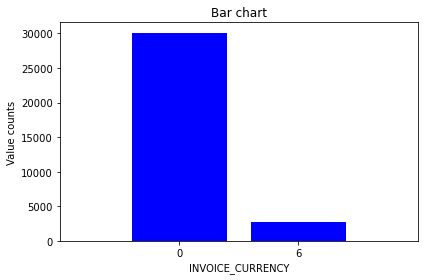

In [87]:
import matplotlib.pyplot as plt
grp_invoice=train_set.groupby('invoice_currency')['invoice_currency'].agg({'count'}).reset_index()
plt.bar(grp_invoice['invoice_currency'].astype(int).astype(str),grp_invoice['count'],color = 'b')
plt.xlabel('INVOICE_CURRENCY')
plt.xlim((-1,grp_invoice['invoice_currency'].nunique()))
plt.ylabel('Value counts')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
######we can infer that invoice_currency has USD as max value_count

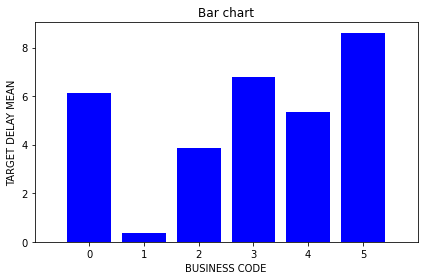

In [88]:
grp_bc=train_set.groupby('business_code')['target_delay'].agg({'mean'}).reset_index()

plt.bar(grp_bc['business_code'].astype(int).astype(str),grp_bc['mean'],color = 'b')
plt.xlabel('BUSINESS CODE')
plt.xlim((-1,grp_bc['business_code'].nunique()))
plt.ylabel('TARGET DELAY MEAN')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###business code labeled 4 has max target_delay mean

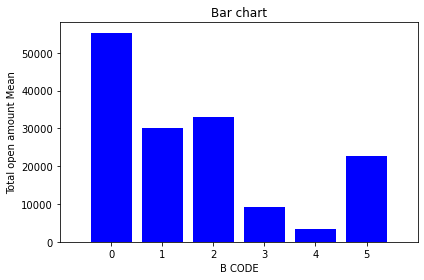

In [91]:
grp_nc=train_set.groupby('business_code')['total_open_amount'].agg({'mean'}).reset_index()

plt.bar(grp_nc['business_code'].astype(int).astype(str),grp_nc['mean'],color = 'b')
plt.xlabel('B CODE')
plt.xlim((-1,grp_nc['business_code'].nunique()))
plt.ylabel('Total open amount Mean')
# Set a title of the current axes.
plt.title('Bar chart')
# Display a figure.
plt.tight_layout()
###displaying avg total amount for each business code 

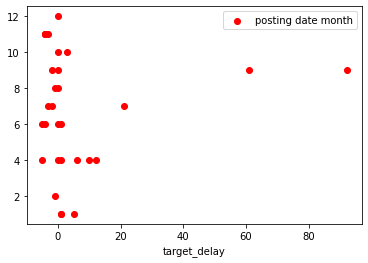

In [92]:
###Scatter plot of posting date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

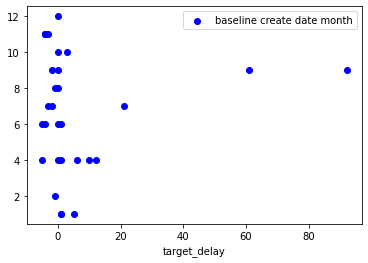

In [93]:
###Scatter plot of baseline create date month with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')
plt.xlabel("target_delay")
plt.legend()
plt.show()

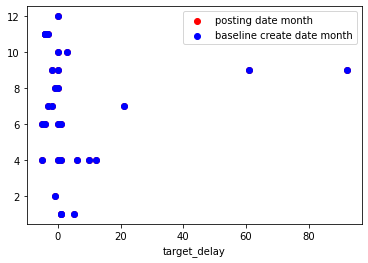

In [94]:
###Scatter plot of posting date month and basline create date with target delay
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['posting_date_month'],color='r',label='posting date month')
plt.scatter(train_set[:30]['target_delay'], train_set[:30]['baseline_create_date_month'],color='b',label='baseline create date month')

plt.xlabel("target_delay")
plt.legend()
plt.show()

### We see both the points overlap each other

In [95]:
####Distribution of various columns to check skewness

In [96]:
##SKEWNESS OF DIFFERENT COLUMNS
from scipy.stats import  skew
print("BUSINESS CODE")
print(skew(train_set['business_code'])) ##highly positive

BUSINESS CODE
4.896496728087402


In [97]:
from scipy.stats import  skew
print("CUSTOMER NUMBER")
print(skew(train_set['cust_number'])) ##highly positive

CUSTOMER NUMBER
5.251869920557536


array([[<AxesSubplot:title={'center':'business_code'}>,
        <AxesSubplot:title={'center':'cust_number'}>,
        <AxesSubplot:title={'center':'name_customer'}>,
        <AxesSubplot:title={'center':'clear_date'}>,
        <AxesSubplot:title={'center':'posting_date'}>],
       [<AxesSubplot:title={'center':'document_create_date'}>,
        <AxesSubplot:title={'center':'document_create_date.1'}>,
        <AxesSubplot:title={'center':'due_in_date'}>,
        <AxesSubplot:title={'center':'invoice_currency'}>,
        <AxesSubplot:title={'center':'total_open_amount'}>],
       [<AxesSubplot:title={'center':'baseline_create_date'}>,
        <AxesSubplot:title={'center':'cust_payment_terms'}>,
        <AxesSubplot:title={'center':'isOpen'}>,
        <AxesSubplot:title={'center':'target_delay'}>,
        <AxesSubplot:title={'center':'create_date_month'}>],
       [<AxesSubplot:title={'center':'create_date.1_month'}>,
        <AxesSubplot:title={'center':'posting_date_month'}>,
        <Ax

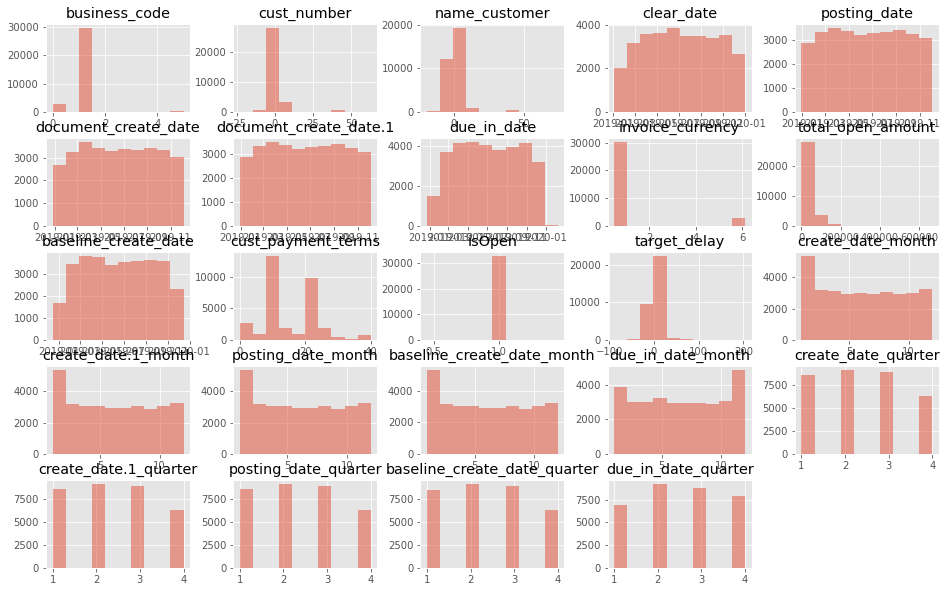

In [98]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot')
train_set.hist(alpha=0.5, figsize=(16, 10))

In [99]:
from scipy.stats import  skew
print("Customer Name")
print(skew(train_set['name_customer']))   ##highly positive

Customer Name
5.246851012405534


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='invoice_currency', ylabel='Density'>

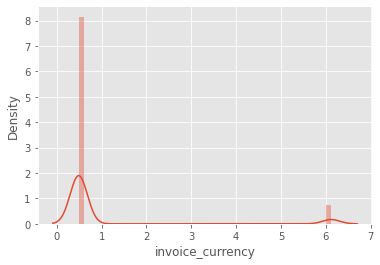

In [100]:
sns.distplot(train_set['invoice_currency'])

In [101]:
from scipy.stats import  skew
print("Invoice Currency")
print(skew(train_set['invoice_currency'])) ##highly positive

Invoice Currency
3.056733736855425


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

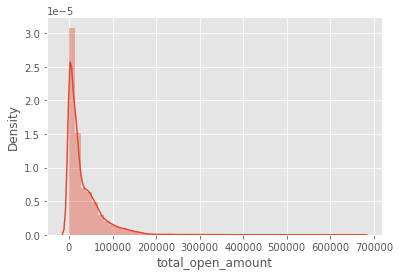

In [102]:
sns.distplot(train_set['total_open_amount'])

In [103]:
from scipy.stats import  skew
print("Total Open Amount")
print(skew(train_set['total_open_amount']))  ##highly positive


Total Open Amount
2.8326990177905524


In [104]:
from scipy.stats import  skew
print("Customer Payment Terms")
print(skew(train_set['cust_payment_terms']))    #less positively skewed

Customer Payment Terms
0.5122732330461132


In [105]:
from scipy.stats import  skew
print("Is Open")
print(skew(train_set['isOpen']))    

Is Open
0.0


In [106]:
print("Baseline Create month ")
print(skew(train_set['baseline_create_date_month']))  

Baseline Create month 
0.017208388926096198


In [107]:
print("Baseline Create Quarter")
print(skew(train_set['baseline_create_date_quarter']))   

Baseline Create Quarter
0.10571379692780127


In [108]:
print("Create Date Month.1 month ")
print(skew(train_set['create_date.1_month'])) 

Create Date Month.1 month 
0.017230833180780326


In [109]:
print("Create date month.1 quarter ")
print(skew(train_set['create_date.1_quarter'])) 

Create date month.1 quarter 
0.10772643593352847


In [110]:
####Skewness of columns which have high correlation with target label will not be altered

In [111]:
###invoice currency is highly positively skewed and it is less correlated with target delay so we apply squarert transformation
train_set['invoice_currency']=np.sqrt(train_set['invoice_currency'])

print(skew(train_set['invoice_currency']))  ###no change 

3.056733736855422


In [112]:
train_set['total_open_amount']=np.sqrt(train_set['total_open_amount'])

print(skew(train_set['total_open_amount']))  ###skewness reduced


0.7776215882066491


In [113]:
train_set.dtypes

business_code                            int32
cust_number                            float64
name_customer                          float64
clear_date                      datetime64[ns]
doc_id                                  object
posting_date                    datetime64[ns]
document_create_date            datetime64[ns]
document_create_date.1          datetime64[ns]
due_in_date                     datetime64[ns]
invoice_currency                       float64
total_open_amount                      float64
baseline_create_date            datetime64[ns]
cust_payment_terms                       int32
isOpen                                 float64
target_delay                             int64
create_date_month                        int64
create_date.1_month                      int64
posting_date_month                       int64
baseline_create_date_month               int64
due_in_date_month                        int64
create_date_quarter                      int64
create_date.1

In [114]:
train_set['doc_id'].unique

<bound method Series.unique of 1        1929646410
2        1929873765
3        1930147974
4        2960581231
5        1930083373
            ...    
39144    1929853889
39147    1929600989
39148    1929744070
39150    1930198546
39151    1928576325
Name: doc_id, Length: 32757, dtype: object>

In [115]:
###doc_id is primary key so drop
train_set.drop(['doc_id'],axis=1,inplace=True)

In [116]:
#remove outliers from target_delay
q1=train_set.target_delay.quantile(0.25)
q3=train_set.target_delay.quantile(0.75)
q1,q3

(-3.0, 2.0)

In [117]:
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
lower_limit,upper_limit

(-10.5, 9.5)

In [118]:
train_set[(train_set.target_delay<lower_limit)|(train_set.target_delay>upper_limit)] ##outlier

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,...,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
2,1,2.453846,11.125000,2019-12-30,2019-09-14,2019-09-14,2019-09-14,2019-09-29,0.699212,47.474835,...,9,9,9,9,9,3,3,3,3,3
4,0,62.850000,74.166667,2019-12-04,2019-09-20,2019-09-20,2019-09-20,2019-10-04,2.474184,149.083332,...,9,9,9,9,10,3,3,3,3,4
21,0,9.735849,8.861111,2019-05-06,2019-04-16,2019-04-16,2019-04-16,2019-04-26,2.474184,220.030180,...,4,4,4,4,4,2,2,2,2,2
26,1,7.316216,3.516129,2019-08-30,2019-07-05,2019-07-01,2019-07-05,2019-08-09,0.699212,180.974805,...,7,7,7,7,8,3,3,3,3,3
34,0,7.000000,9.558140,2019-05-31,2019-04-12,2019-04-12,2019-04-12,2019-05-19,2.474184,178.088349,...,4,4,4,4,5,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39098,1,0.282828,0.636364,2019-07-02,2019-06-13,2019-06-09,2019-06-13,2019-07-15,0.699212,47.895302,...,6,6,6,6,7,2,2,2,2,3
39103,1,2.369128,1.746896,2019-11-27,2019-10-21,2019-10-19,2019-10-21,2019-11-05,0.699212,176.757800,...,10,10,10,10,11,4,4,4,4,4
39115,1,-2.480687,0.882353,2019-12-02,2019-11-15,2019-11-14,2019-11-15,2019-12-25,0.699212,55.565277,...,11,11,11,11,12,4,4,4,4,4
39131,1,-6.342513,-6.772727,2019-06-07,2019-05-23,2019-05-23,2019-05-23,2019-06-26,0.699212,84.464134,...,5,5,5,5,6,2,2,2,2,2


In [119]:
train_set=train_set[(train_set.target_delay>lower_limit)&(train_set.target_delay<upper_limit)] ##removr outlier
train_set.reset_index(drop=True)

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,...,create_date_month,create_date.1_month,posting_date_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
0,1,-2.200000,26.500000,2019-08-08,2019-07-22,2019-07-22,2019-07-22,2019-08-11,0.699212,282.235008,...,7,7,7,7,8,3,3,3,3,3
1,1,-2.298250,-2.036657,2019-11-25,2019-11-13,2019-11-13,2019-11-13,2019-11-28,0.699212,182.025520,...,11,11,11,11,11,4,4,4,4,4
2,1,-2.298250,-2.456432,2019-11-12,2019-11-01,2019-10-31,2019-11-01,2019-11-16,0.699212,85.781641,...,10,11,11,11,11,4,4,4,4,4
3,1,-2.298250,-2.597183,2019-06-18,2019-06-07,2019-06-05,2019-06-07,2019-06-22,0.699212,126.471499,...,6,6,6,6,6,2,2,2,2,2
4,1,0.363905,-0.300000,2019-03-06,2019-02-20,2019-02-19,2019-02-20,2019-03-07,0.699212,5.350701,...,2,2,2,2,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30230,1,0.903785,0.696429,2019-09-26,2019-09-10,2019-09-09,2019-09-10,2019-09-25,0.699212,23.341380,...,9,9,9,9,9,3,3,3,3,3
30231,1,0.363905,-0.175000,2019-07-25,2019-07-10,2019-07-09,2019-07-10,2019-07-25,0.699212,291.170740,...,7,7,7,7,7,3,3,3,3,3
30232,1,-2.298250,-2.503526,2019-09-03,2019-08-15,2019-08-14,2019-08-15,2019-08-30,0.699212,82.258981,...,8,8,8,8,8,3,3,3,3,3
30233,1,0.903785,0.696429,2019-12-12,2019-11-27,2019-11-26,2019-11-27,2019-12-12,0.699212,7.967434,...,11,11,11,11,12,4,4,4,4,4


In [120]:
###Graph between create date.1 and posting date whith target variable

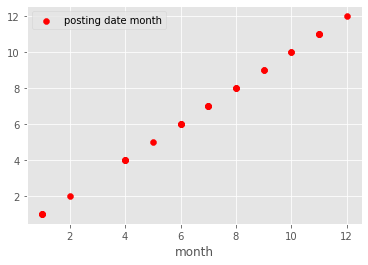

In [121]:
plt.scatter(train_set[:30]['create_date.1_month'], train_set[:30]['posting_date_month'],color='r',label='posting date month')

plt.xlabel("month")
plt.legend()
plt.show()


In [122]:
#corr is 1.00 and graph shows their strongly related so dropping posting_date_month
c1=train_set['posting_date_month'].corr(train_set['baseline_create_date_month'])
c2=train_set['posting_date_month'].corr(train_set['target_delay'])
c1,c2

(0.9991206886617264, -0.01015916344796128)

In [123]:
train_set.drop(['posting_date_month'],axis=1,inplace=True)
train_set

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,...,target_delay,create_date_month,create_date.1_month,baseline_create_date_month,due_in_date_month,create_date_quarter,create_date.1_quarter,posting_date_quarter,baseline_create_date_quarter,due_in_date_quarter
1,1,-2.200000,26.500000,2019-08-08,2019-07-22,2019-07-22,2019-07-22,2019-08-11,0.699212,282.235008,...,-3,7,7,7,8,3,3,3,3,3
3,1,-2.298250,-2.036657,2019-11-25,2019-11-13,2019-11-13,2019-11-13,2019-11-28,0.699212,182.025520,...,-3,11,11,11,11,4,4,4,4,4
5,1,-2.298250,-2.456432,2019-11-12,2019-11-01,2019-10-31,2019-11-01,2019-11-16,0.699212,85.781641,...,-4,10,11,11,11,4,4,4,4,4
6,1,-2.298250,-2.597183,2019-06-18,2019-06-07,2019-06-05,2019-06-07,2019-06-22,0.699212,126.471499,...,-4,6,6,6,6,2,2,2,2,2
7,1,0.363905,-0.300000,2019-03-06,2019-02-20,2019-02-19,2019-02-20,2019-03-07,0.699212,5.350701,...,-1,2,2,2,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39144,1,0.903785,0.696429,2019-09-26,2019-09-10,2019-09-09,2019-09-10,2019-09-25,0.699212,23.341380,...,1,9,9,9,9,3,3,3,3,3
39147,1,0.363905,-0.175000,2019-07-25,2019-07-10,2019-07-09,2019-07-10,2019-07-25,0.699212,291.170740,...,0,7,7,7,7,3,3,3,3,3
39148,1,-2.298250,-2.503526,2019-09-03,2019-08-15,2019-08-14,2019-08-15,2019-08-30,0.699212,82.258981,...,4,8,8,8,8,3,3,3,3,3
39150,1,0.903785,0.696429,2019-12-12,2019-11-27,2019-11-26,2019-11-27,2019-12-12,0.699212,7.967434,...,0,11,11,11,12,4,4,4,4,4
